# Statistics
## From "Exercises in statistics.ipynb" February 10, 2025 
### Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [27]:
energy = pd.read_csv('C:\\Users\\Hassan\\Desktop\\Data and Things\\code\\Data_and_Things_W2025_Exercises\\data\\energySoftware.csv')
energy

,test,PKG,CPU,nn,nn2,time
0,bubblesort,0.010986,0.009155,,,3.165
1,bubblesort,0.013184,0.010925,,,3.069
2,bubblesort,0.015198,0.009399,,,2.617
3,bubblesort,0.010559,0.009583,,,2.572
4,bubblesort,0.009949,0.009949,,,2.671
...,...,...,...,...,...,...
1436,bubblesort_ll,0.013184,0.014038,,,2.394
1437,bubblesort_ll,0.021362,0.014343,,,2.428
1438,bubblesort_ll,0.013672,0.014221,,,2.479
1439,bubblesort_ll,0.019531,0.014526,,,2.537


### 1. Plot the distribution of CPU for each test type

Key takeaways:

* `bubblesort` looks to have the lowest mean, median and IQR in terms of CPU usage. `bubblesort` also has the largest spead in IQR, indicating less inconsistency in terms of CPU usage. Per `bubblesort`'s histogram a left skew is visible with nicely distributed data. The spread in IQR is visible here as the spread of the distribution is wide.
<br>
<br>

* `bubblesort_func` and `bubblesort_ll2` has a higher CPU usage with `bubblesort_ll2` coming out on top. The data for these contain outliers past the whiskers. Their IQR is narrow indicating more consistency with CPU usage. Both these sorting algorithms display a right skew in their histograms. In line with their IQR their distribution is narrower than that of `bubblesort`.
<br>
<br>

* Finally, `bubblesort_ll` has a lower median CPU usage than `bubblesort_func` and `bubblesort_ll2` and displays less outliers as well. Compared to `bubblesort` it has much narrower IQR, suggesting it uses CPU in a more consistent way.
<br>
<br>

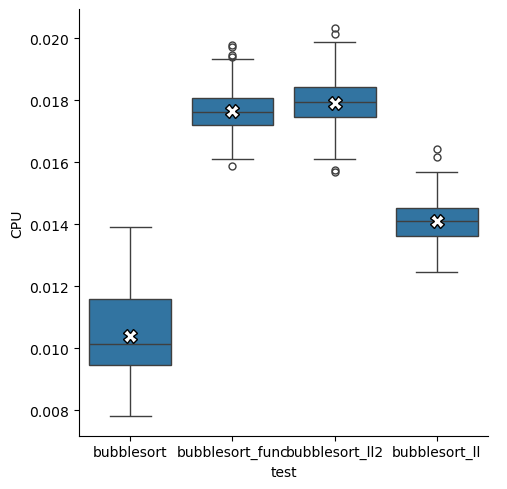

In [28]:
sns.catplot(x='test', y="CPU", data = energy, kind="box", showmeans=True, meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

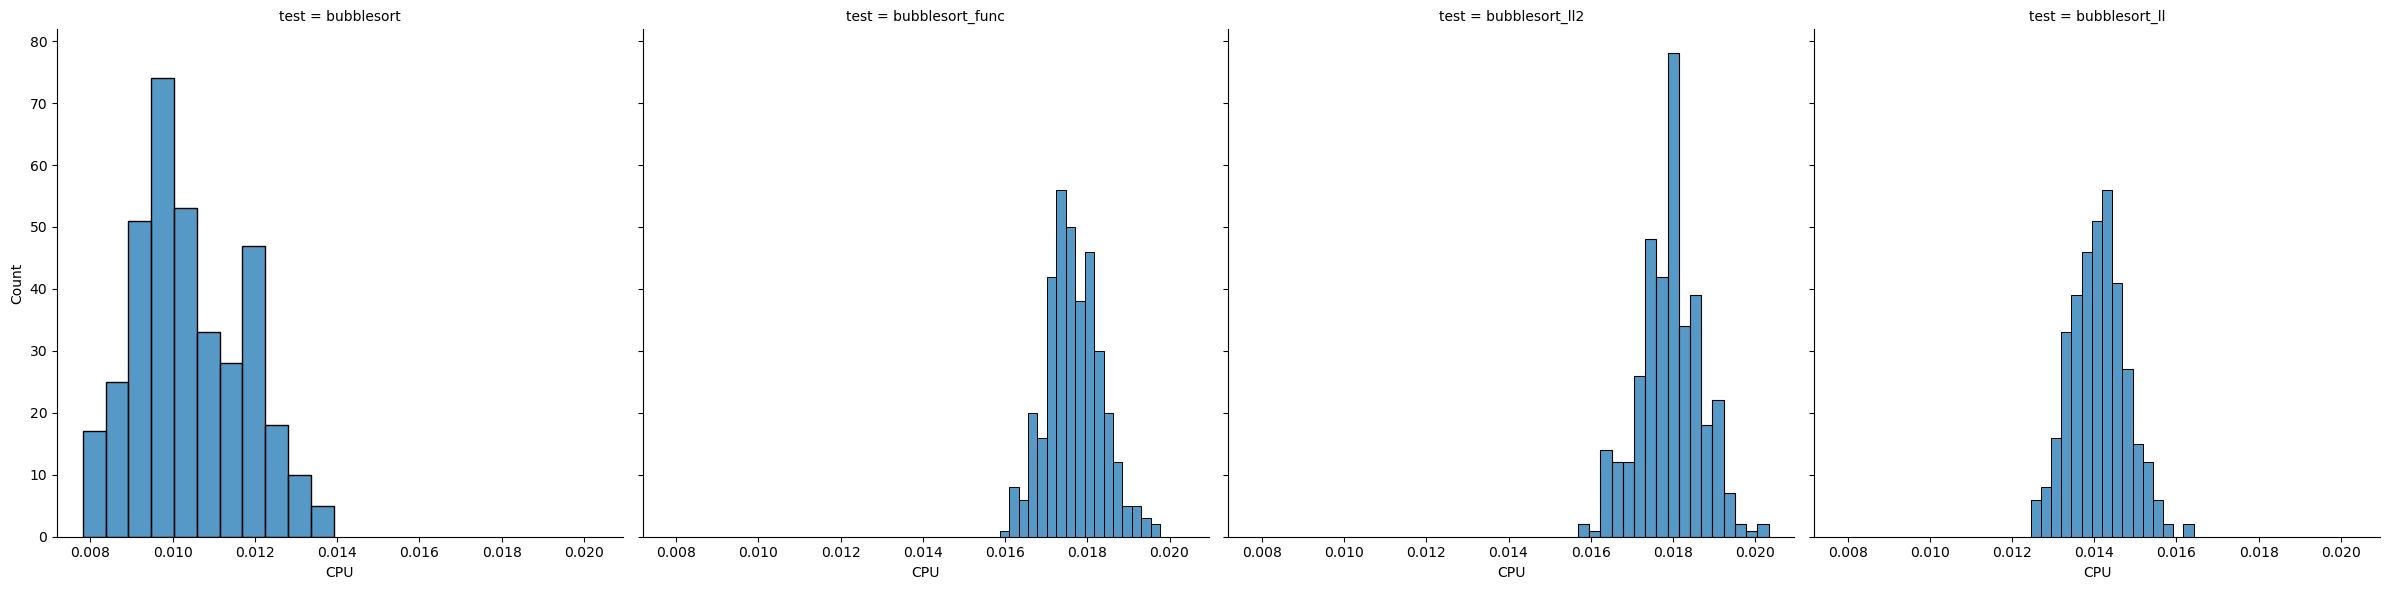

In [29]:
g = sns.FacetGrid(data=energy, col="test", height= 6)
g.map(sns.histplot, 'CPU')
plt.show()
#looks very distributed

<!-- ### 2.1 Justification of choice of test(s) for difference bubblesort and bublesort_II and CPU usage

1. To start out - We are again comparing between two types of sorting algoritms and their CPU usage - So a comparison.
2. The type of data is continuos as it is a measurement of CPU usage, which is a numerical ratio.
3. Whether or not I should select a Parametric or Non-Parametric test:
3.1 There are 1441 entries, so a larger sample size.
3.2 The data has a normal distribution.
3.3 Thus we assume to go Parametric
4. We are comparing two groups.
5. The groups we are comparing are different. 

**Thus: we will be performing a Student t-test.**

 -->


### 2.2 Actual testing for difference between bubblesort and bublesort_II in CPU usage
null hypothesis is:
**<br> There is no significant difference in CPU usage between the two algorithms. <br>**
Alternative hypothesis is that there is a difference. <br>
Level of significance is set to > 0.05.
We are returned a pvalue of `pvalue=np.float64(9.831404686370246e-224)` or
0.00…00​​9831404686370246 with 0.223 zeros between the elipsies<br>
<br>
pvalue is so heavily under our significance level, that we can reject the null hypothesis, and say there is a statistic difference between the types of algorithms 

In [30]:
stats.ttest_ind(energy[energy["test"]=="bubblesort"]["CPU"], energy[energy["test"]=="bubblesort_ll"]["CPU"])


TtestResult(statistic=np.float64(-47.4605163039462), pvalue=np.float64(9.831404686370246e-224), df=np.float64(719.0))

### 3.1 Justification of choice of test(s) for difference between bubblesort_func and bublesort_II2 in CPU usage

1. To start out - We are again comparing between two types of sorting algoritms and their CPU usage - So a again a comparison.
2. The type of data is still a measurement, whuch is contious.
3. Whether or not I should select a Parametric or Non-Parametric test:
3.1 Dataset is considered large.
3.2 Normally distributed
3.3 So we go Parametric
4. Comapring between two groups
5. Different groups.

**Again: we will be performing a Student t-test.**


### 3.2 Actual testing for difference between bubblesort_func and bublesort_II2 in CPU usage
null hypothesis is:
**<br> There is no significant difference in CPU usage between the two algorithms. <br>**
Alternative hypothesis is that there is a difference. <br>

Level of significance is set to > 0.05.
We are returned a pvalue of `3.2355729348933066e-06` or 0.0000032355729348933066
<br>
<br>
pvalue is so heavily under our significance level, that we can reject the null hypothesis, and say there is a statistic difference between the types of algorithms 

In [ ]:
stats.ttest_ind(energy[energy["test"]=="bubblesort_func"]["CPU"], energy[energy["test"]=="bubblesort_ll2"]["CPU"])


TtestResult(statistic=np.float64(-4.692273179928857), pvalue=np.float64(3.2355729348933066e-06), df=np.float64(718.0))

### 4.1 Justification of choice of test(s) for difference between bubblesort and bubblesort_ll and time

1. To start out - We are again comparing between two types of sorting algoritms and their respective time to compute - So a again a comparison.
2. The type of data is still a measurement, time, which is continious.
3. Whether or not I should select a Parametric or Non-Parametric test:
3.1 Dataset is considered large.
3.2 While the histogram for bubblesort_ll shows the distribution is somewhat normal (with a bit of a right tail), the data for bubblesort does not appear normally distributed, having multiple peaks and is skewed.
In such a case we will go with a non-paramatric test as they are more robust. According to this (https://www.6sigma.us/six-sigma-in-focus/normality-test-lean-six-sigma/) 
"Parametric tests, such as t-tests, ANOVA, and regression analyses, rely heavily on the assumption of normality. When this assumption is violated, the results of these tests may be inaccurate or misleading."
So just i'll be doing a non-parametric test, since I can't be certain. 
4. Comapring between two groups
5. Different groups.

**So, we will be performing a Mann-Whitney U Test.**


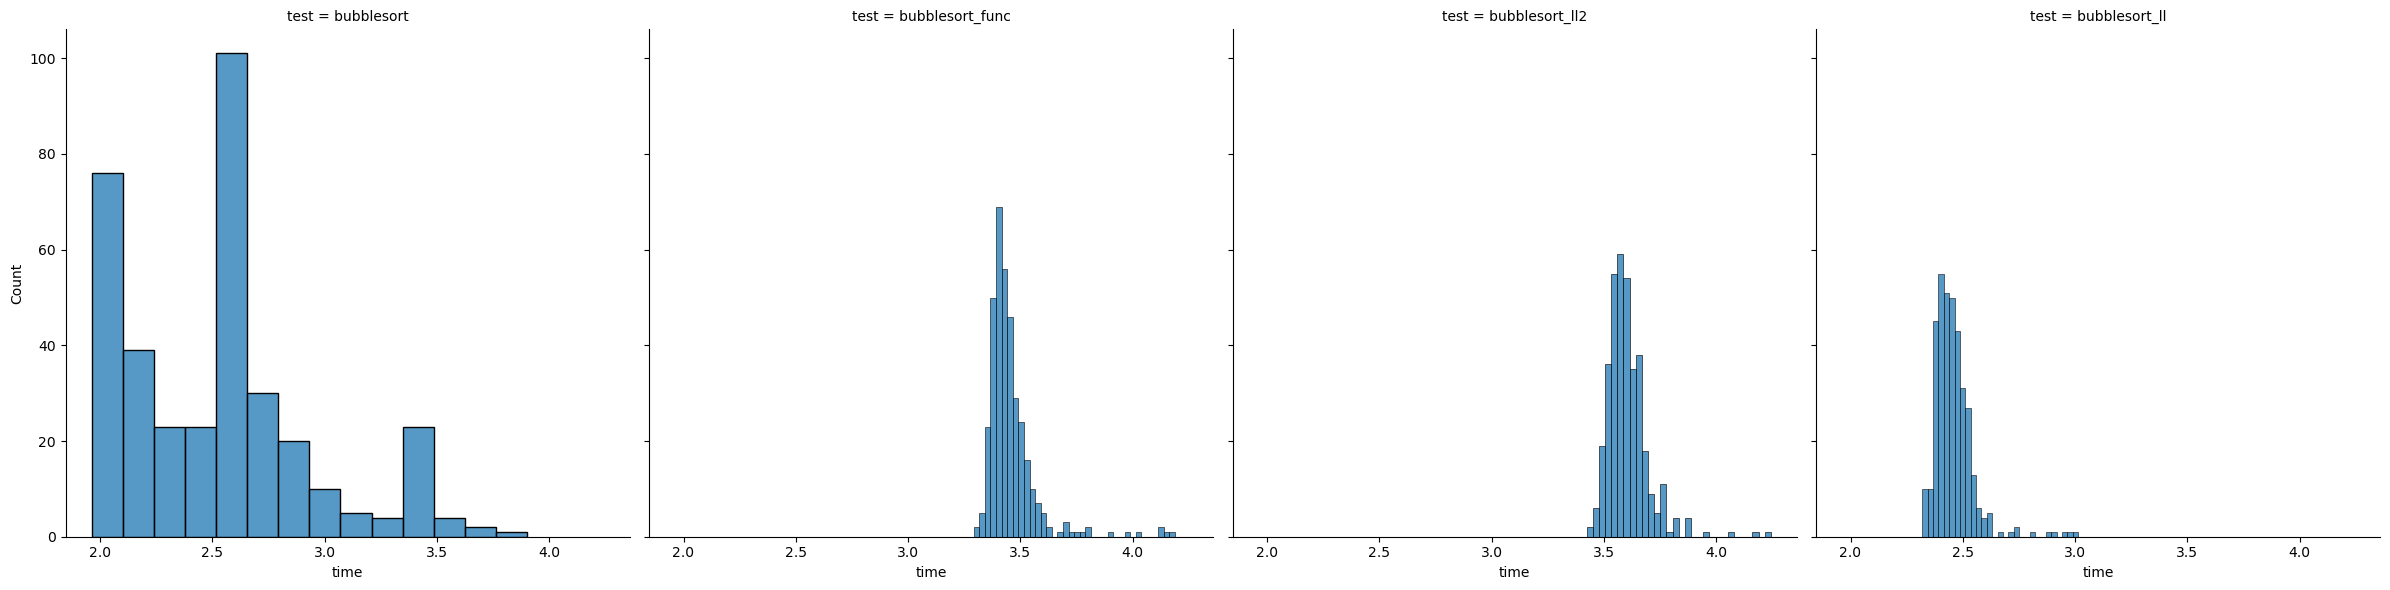

In [32]:
bbft = energy[energy["test"]=="bubblesort_func"]["time"].reset_index()

g = sns.FacetGrid(data=energy, col="test", height= 6)
g.map(sns.histplot, 'time')
plt.show()

### 4.2 Actual testing for difference between bubblesort and bublesort_II and time
null hypothesis is:
**<br> There is no significant difference in CPU usage between the two algorithms. <br>**
Alternative hypothesis is that there is a difference.<br>

Level of significance is set to > 0.05.

We receive a pvalue of 0.00035855213302219286, which is well below the significance level. Thus we reject the null hypothesis

In [33]:
stats.mannwhitneyu(energy[energy["test"]=="bubblesort"]["time"], energy[energy["test"]=="bubblesort_ll"]["time"]).pvalue



np.float64(0.00035855213302219286)

# 5. Perform an ANOVA test to test if there is a difference in means across groups for CPU

We can visually inspect the histograms for CPU and predict there's going to be a difference discovered through the ANOVA test.

According to () "The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean."

With a result of 0.0, we have disproven the null hypothesis and can confidently say there is a difference in mean for all the algorithms CPU usage

In [72]:
bubblesort_cpu = energy[energy["test"] == "bubblesort"]["CPU"]
bubblesort_ll_cpu = energy[energy["test"] == "bubblesort_ll"]["CPU"]
bubblesort_ll2_cpu = energy[energy["test"] == "bubblesort_ll2"]["CPU"]
bubblesort_func_cpu = energy[energy["test"] == "bubblesort_func"]["CPU"]


stats.f_oneway(bubblesort_cpu, bubblesort_ll_cpu, bubblesort_ll2_cpu, bubblesort_func_cpu)

F_onewayResult(statistic=np.float64(5641.93769602928), pvalue=np.float64(0.0))

# 6. Perform an ANOVA test to test if there is a difference in means across groups for time

And same for time.
the result of 0.0, show we can disprove the null hypothesis.

In [73]:
bubblesort_time = energy[energy["test"] == "bubblesort"]["time"]
bubblesort_ll_time = energy[energy["test"] == "bubblesort_ll"]["time"]
bubblesort_ll2_time = energy[energy["test"] == "bubblesort_ll2"]["time"]
bubblesort_func_time = energy[energy["test"] == "bubblesort_func"]["time"]


stats.f_oneway(bubblesort_time, bubblesort_ll_time, bubblesort_ll2_time, bubblesort_func_time)

F_onewayResult(statistic=np.float64(2556.3329354127823), pvalue=np.float64(0.0))